Fitted circle center: (4.70, 3.35)
Fitted circle radius: 2.39


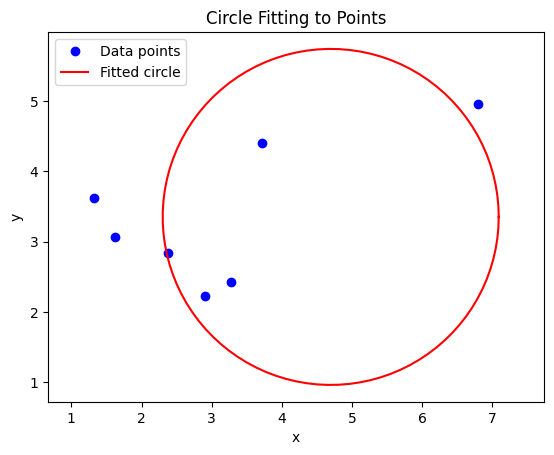

In [12]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Generate random points
num_points = 7
x_random = np.random.uniform(1, 8, num_points)
y_random = np.random.uniform(2, 5, num_points)
points = np.column_stack((x_random, y_random))

# Function to compute the distance of each point from the circle
def residuals(params, points):
    x_center, y_center, radius = params
    return np.sqrt((points[:, 0] - x_center) ** 2 + (points[:, 1] - y_center) ** 2) - radius

# Initial guess for the parameters (x_center, y_center, radius)
x0 = np.mean(points[:, 0])
y0 = np.mean(points[:, 1])
r0 = np.mean(np.sqrt((points[:, 0] - x0) ** 2 + (points[:, 1] - y0) ** 2))

# Perform the least squares fitting
result = least_squares(residuals, x0=[x0, y0, r0], args=(points,))
x_center, y_center, radius = result.x

# Print the fitted parameters
print(f"Fitted circle center: ({x_center:.2f}, {y_center:.2f})")
print(f"Fitted circle radius: {radius:.2f}")

# Plot the points and the fitted circle
theta = np.linspace(0, 2 * np.pi, 100)
x_fit = x_center + radius * np.cos(theta)
y_fit = y_center + radius * np.sin(theta)

plt.figure()
plt.plot(points[:, 0], points[:, 1], 'bo', label='Data points')
plt.plot(x_fit, y_fit, 'r-', label='Fitted circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Circle Fitting to Points')
plt.axis('equal')
plt.show()
